In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
board = np.zeros((8,8)).astype(int)
board[7][:] = [5,3,3,9,10,3,3,5] 
board[6][:] = [1,1,1,1,1,1,1,1] 
board[0][:] = -board[7][:]
board[1][:] = -board[6][:]
board

array([[ -5,  -3,  -3,  -9, -10,  -3,  -3,  -5],
       [ -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   1,   1,   1,   1,   1,   1],
       [  5,   3,   3,   9,  10,   3,   3,   5]])

In [4]:
def setup_board():
    board = np.zeros((8, 8)).astype(int)
    board[7][:] = [5, 3, 3, 9, 10, 3, 3, 5]
    board[6][:] = [1, 1, 1, 1, 1, 1, 1, 1]
    board[0][:] = -board[7][:]
    board[1][:] = -board[6][:]
    return board


def bishop(x, y):
    return {(x + n, y + n) for n in range(-7, 8) if n != 0 and 0 <= x + n < 8 and 0 <= y + n < 8} | \
           {(x + n, y - n) for n in range(-7, 8) if n != 0 and 0 <= x + n < 8 and 0 <= y - n < 8}


def rook(x, y):
    return {(x + n, y) for n in range(-7, 8) if n != 0 and 0 <= x + n < 8} | \
           {(x, y + n) for n in range(-7, 8) if n != 0 and 0 <= y + n < 8}


def queen(x, y):
    return bishop(x, y) | rook(x, y)


def knight(x, y):
    return {(x + i, y + j) for i, j in zip([1, 2, -1, -2, 1, 2, -1, -2], [2, 1, 2, 1, -2, -1, -2, -1])
            if 0 <= x + i < 8 and 0 <= y + j < 8}


def king(x, y):
    return {(x + i, y + j) for i, j in zip([-1, 0, 1, -1, 0, 1, -1, 0, 1], [-1, -1, -1, 0, 0, 0, 1, 1, 1])
            if 0 <= x + i < 8 and 0 <= y + j < 8}


def wpawn(x, y):
    out = set()
    if y > 1:
        out.add((x - 1, y))
        if x == 6:
            out.add((x - 2, y))
    if y == 1:  # promotion
        pass
    return out


def bpawn(x, y):
    out = set()
    if y < 6:
        out.add((x + 1, y))
        if x == 1:
            out.add((x + 2, y))
    if y == 6:  # promotion
        pass
    return out


In [28]:
ind = np.array(list(zip(*bishop(3,3))))
mask[ind[0], ind[1]]=1
mask

array([[1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

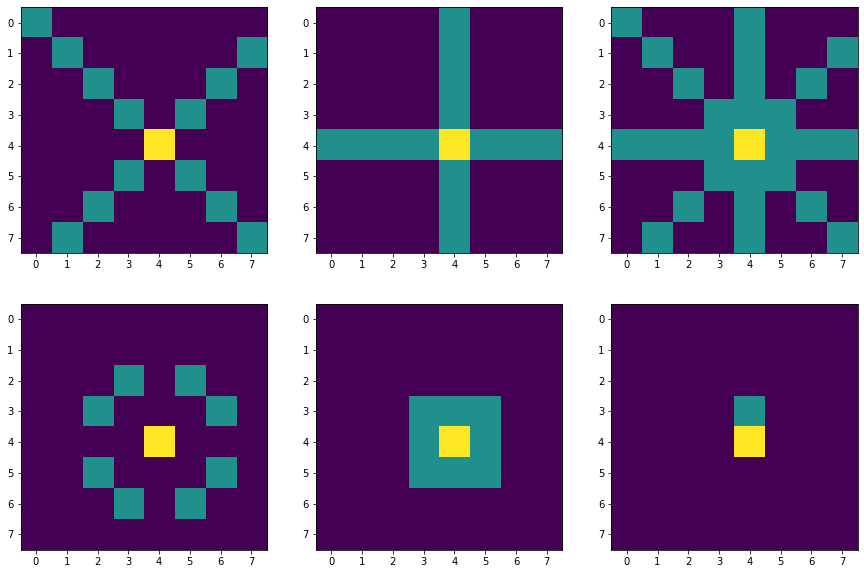

In [3]:
ex, ey = 4, 4

f, axs = plt.subplots(2, 3)
f.set_figheight(10)
f.set_figwidth(15)

visu = np.zeros((8,8))
ind = np.array(list(zip(*bishop(ex,ey))))
visu[ind[0], ind[1]]=1
visu[ex,ey] = 2
    
axs[0, 0].imshow(visu)
    
visu = np.zeros((8,8))
ind = np.array(list(zip(*rook(ex,ey))))
visu[ind[0], ind[1]]=1
visu[ex,ey] = 2
    
axs[0, 1].imshow(visu)
    
visu = np.zeros((8,8))
ind = np.array(list(zip(*queen(ex,ey))))
visu[ind[0], ind[1]]=1
visu[ex,ey] = 2
    
axs[0, 2].imshow(visu)

visu = np.zeros((8,8))
ind = np.array(list(zip(*knight(ex,ey))))
visu[ind[0], ind[1]]=1
visu[ex,ey] = 2
    
axs[1, 0].imshow(visu)

visu = np.zeros((8,8))
ind = np.array(list(zip(*king(ex,ey))))
visu[ind[0], ind[1]]=1
visu[ex,ey] = 2
    
axs[1, 1].imshow(visu)

visu = np.zeros((8,8))
ind = np.array(list(zip(*wpawn(ex,ey))))
visu[ind[0], ind[1]]=1
visu[ex,ey] = 2
    
axs[1, 2].imshow(visu)
plt.show()